In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [2]:
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

In [3]:
df = pd.read_csv('D:\\Ботва\\Магистратура\\2сем\\ММО\\ЛАБ3\\stars.csv')
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [4]:
df_new = df[['Temperature','L', 'R', 'A_M', 'Type']]

In [5]:
df_new.shape

(240, 5)

In [6]:
# Нужно ли масштабирование
df_new.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [7]:
# DataFrame не содержащий целевой признак
df_ne_cel = df_new.drop('Type', axis=1)

In [8]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=df_ne_cel.columns)
    return res

In [9]:
#Деление выборки на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    df_ne_cel, df_new['Type'], test_size= 0.2, random_state= 1)

In [10]:
# Размер обучающей выборки
X_train.shape, y_train.shape

((192, 4), (192,))

In [11]:
# Размер тестовой выборки
X_test.shape, y_test.shape

((48, 4), (48,))

In [12]:
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((192, 4), (48, 4))

In [13]:
#Min-Max Масштабирование

# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(df_ne_cel)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,Temperature,L,R,A_M
count,240.000000,2.400000e+02,240.000000,240.000000
mean,0.224862,1.261901e-01,0.121709,0.509768
std,0.250977,2.112409e-01,0.265413,0.329347
min,0.000000,0.000000e+00,0.000000,0.000000
25%,0.036921,9.238657e-10,0.000048,0.177846
50%,0.100812,8.290363e-08,0.000387,0.632677
75%,0.344618,2.331591e-01,0.021936,0.801048
max,1.000000,1.000000e+00,1.000000,1.000000


In [14]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

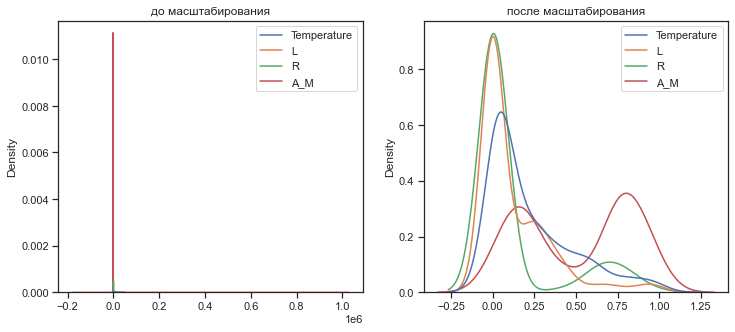

In [15]:
draw_kde(['Temperature', 'L', 'R', 'A_M'], df_new, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

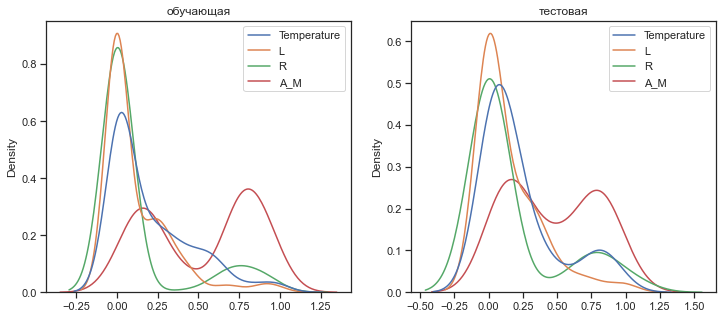

In [16]:
draw_kde(['Temperature', 'L', 'R', 'A_M'], data_cs32_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')

In [17]:
# Масштабирование по Медиане
cs41 = RobustScaler()
data_cs41_scaled_temp = cs41.fit_transform(df_ne_cel)
# формируем DataFrame на основе массива
data_cs41_scaled = arr_to_df(data_cs41_scaled_temp)
data_cs41_scaled.describe()

,Temperature,L,R,A_M
count,240.000000,2.400000e+02,2.400000e+02,2.400000e+02
mean,0.403156,5.412183e-01,5.543037e+00,-1.972205e-01
std,0.815662,9.059947e-01,1.212636e+01,5.284753e-01
min,-0.327634,-3.555668e-07,-1.768227e-02,-1.015203e+00
25%,-0.207642,-3.516044e-07,-1.546993e-02,-7.298294e-01
50%,0.000000,-1.323489e-23,1.301043e-18,4.857226e-17
75%,0.792358,9.999996e-01,9.845301e-01,2.701706e-01
max,2.922318,4.288917e+00,4.567088e+01,5.894129e-01


In [18]:
cs42 = RobustScaler()
cs42.fit(X_train)
data_cs42_scaled_train_temp = cs42.transform(X_train)
data_cs42_scaled_test_temp = cs42.transform(X_test)
# формируем DataFrame на основе массива
data_cs42_scaled_train = arr_to_df(data_cs42_scaled_train_temp)
data_cs42_scaled_test = arr_to_df(data_cs42_scaled_test_temp)

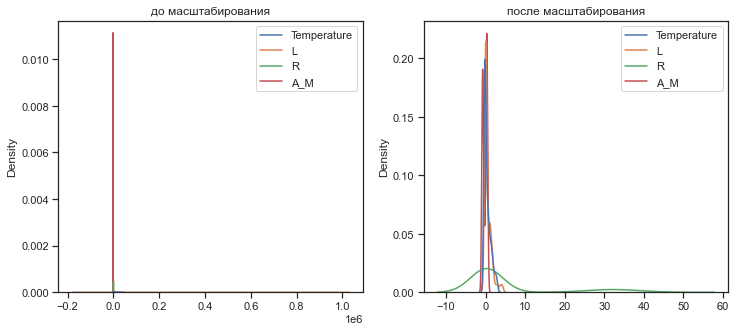

In [19]:
draw_kde(['Temperature', 'L', 'R', 'A_M'], df_new, data_cs41_scaled, 'до масштабирования', 'после масштабирования')

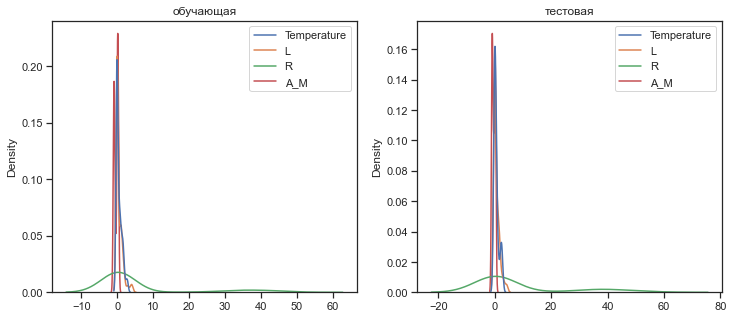

In [20]:
draw_kde(['Temperature', 'L', 'R', 'A_M'], data_cs42_scaled_train, data_cs42_scaled_test, 'обучающая', 'тестовая')

In [21]:
# Масштабирование Mean Normalisation

class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [22]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(df_ne_cel)
data_cs21_scaled.describe()

,Temperature,L,R,A_M
count,240.000000,240.000000,240.000000,240.000000
mean,0.004099,0.004655,0.009761,-0.010436
std,0.255412,0.211241,0.290702,0.329759
min,-0.224737,-0.121535,-0.123544,-0.520843
25%,-0.187164,-0.121535,-0.123491,-0.342775
50%,-0.122144,-0.121535,-0.123120,0.112626
75%,0.125971,0.111624,-0.099519,0.281208
max,0.792937,0.878465,0.971734,0.480409


In [23]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

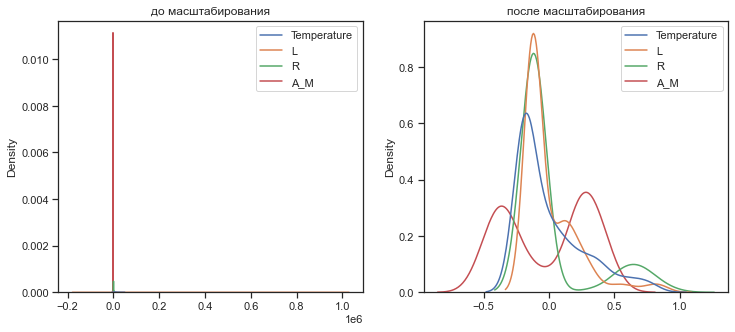

In [24]:
draw_kde(['Temperature', 'L', 'R', 'A_M'], df_new, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

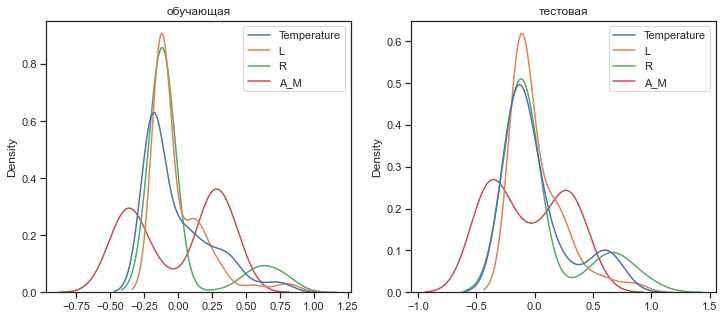

In [25]:
draw_kde(['Temperature', 'L', 'R', 'A_M'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

In [26]:
#Обработка выбросов. Удаление
df_del=df[['Temperature','L', 'R', 'A_M']]
df_del.shape

(240, 4)

In [27]:
x_col_list = ['Temperature','L', 'R', 'A_M']

In [28]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

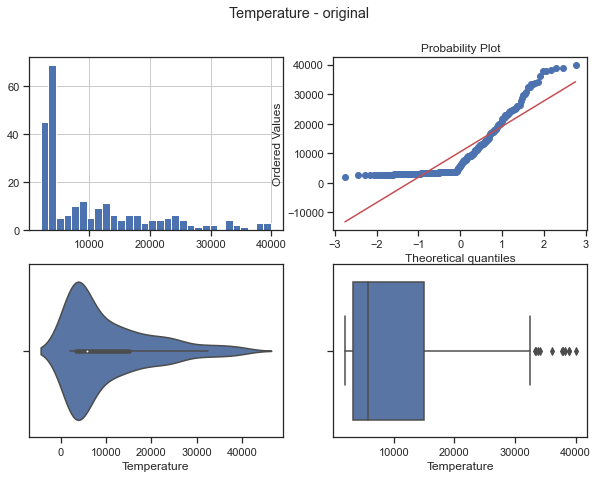

In [29]:
diagnostic_plots(df_del, 'Temperature', 'Temperature - original')

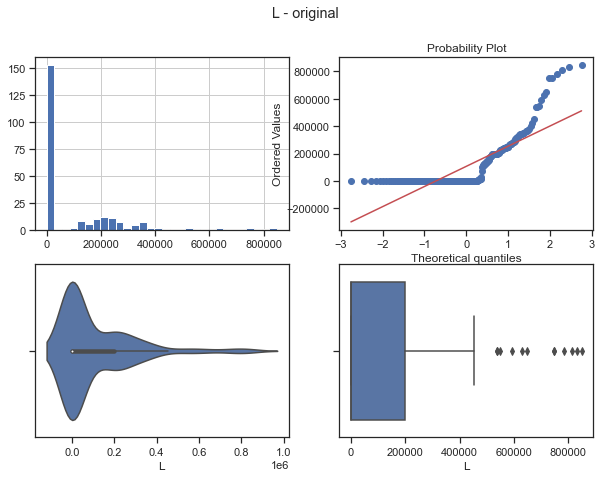

In [30]:
diagnostic_plots(df_del, 'L', 'L - original')

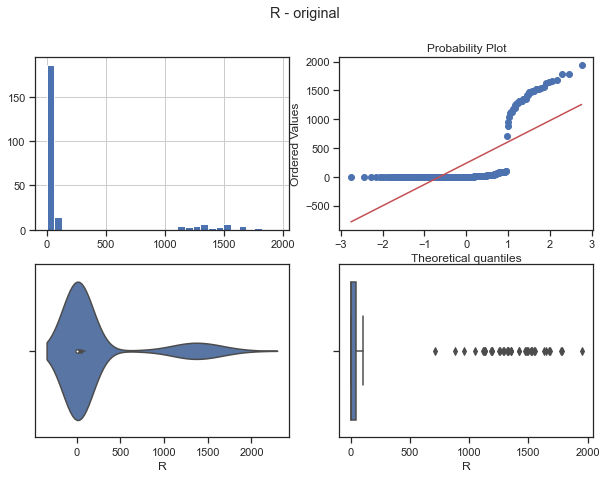

In [31]:
diagnostic_plots(df_del, 'R', 'R - original')

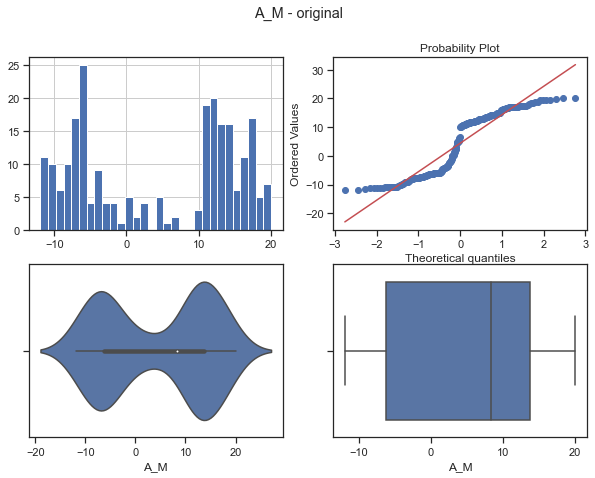

In [32]:
diagnostic_plots(df_del, 'A_M', 'A_M - original')

In [33]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [34]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary    

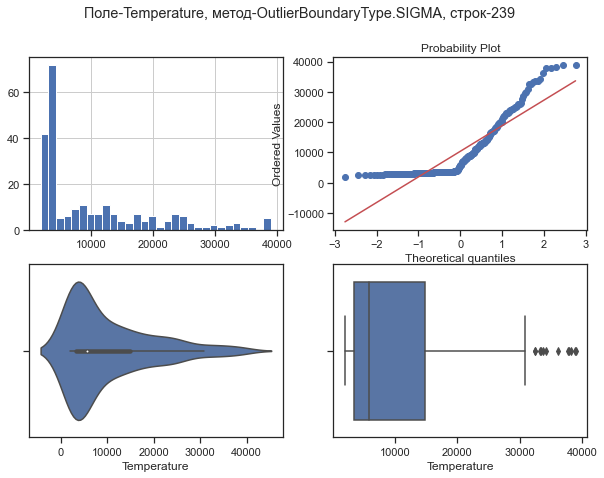

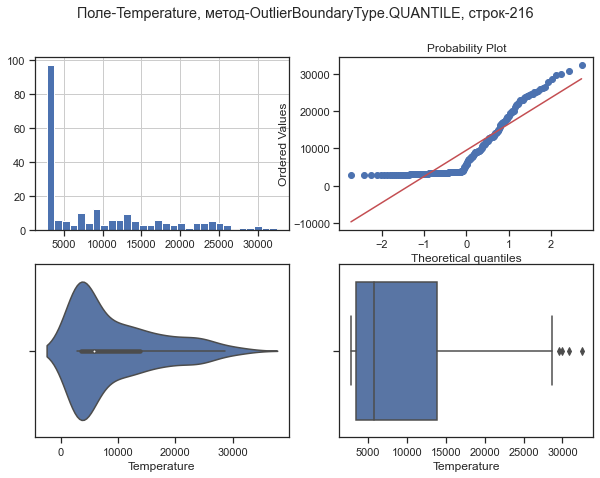

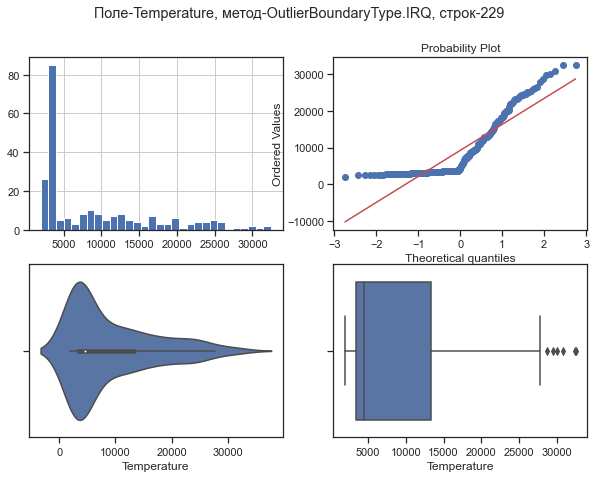

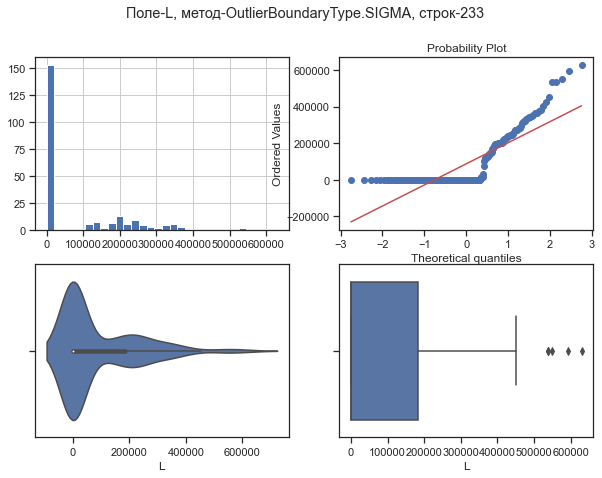

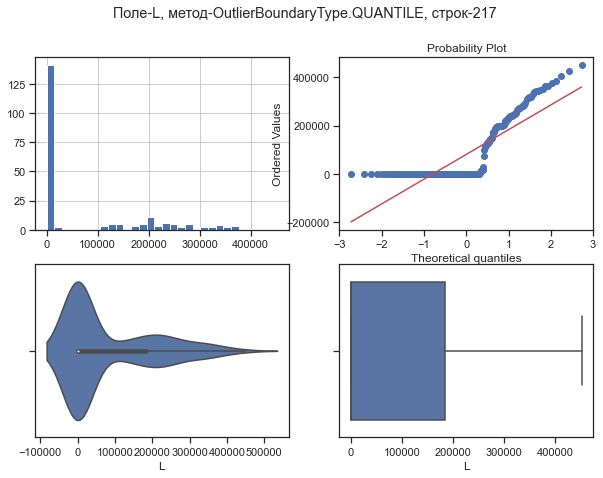

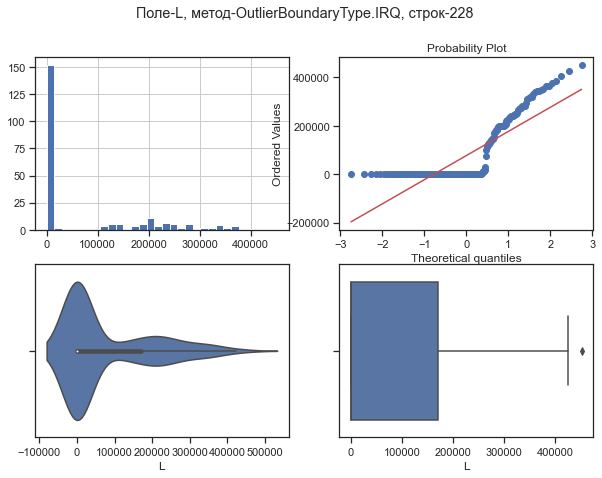

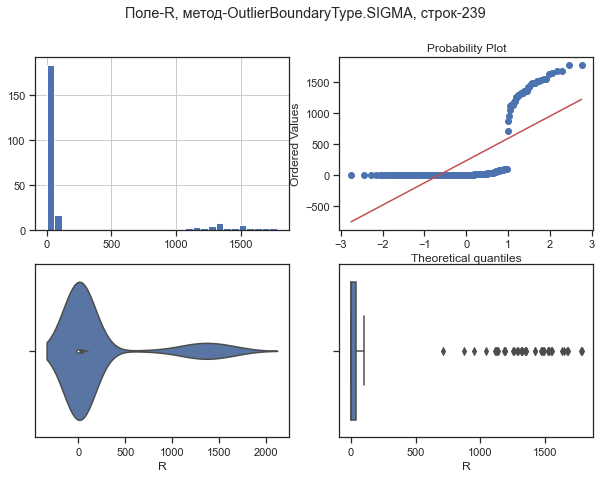

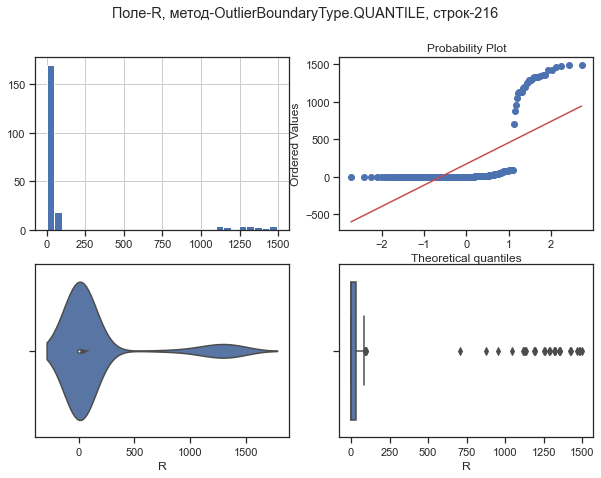

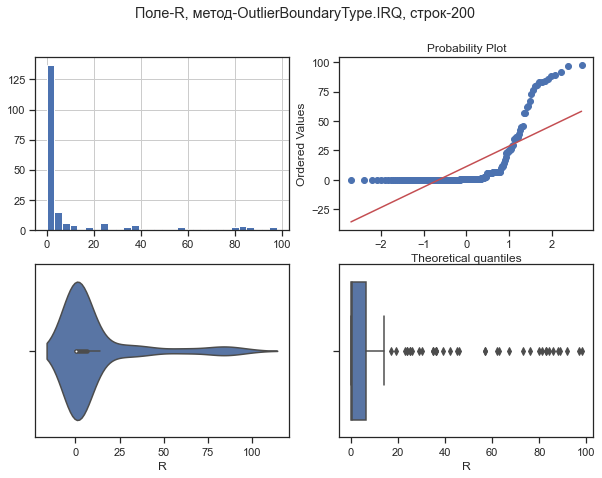

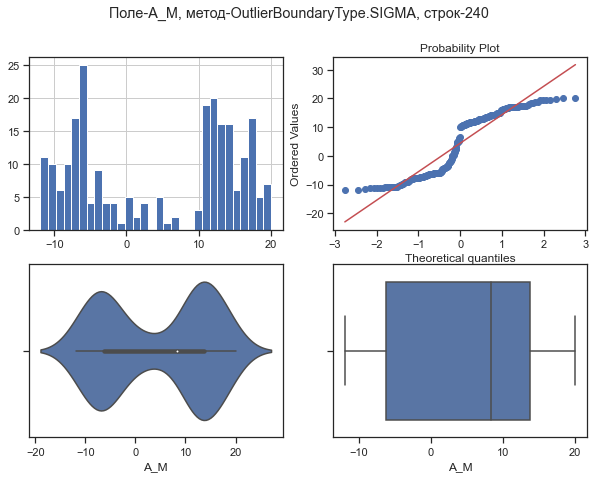

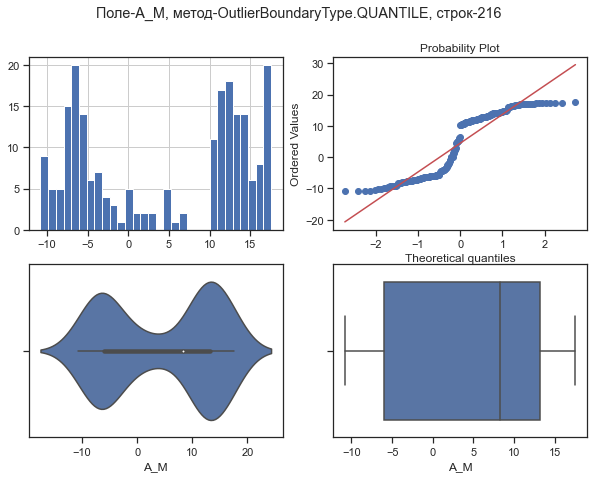

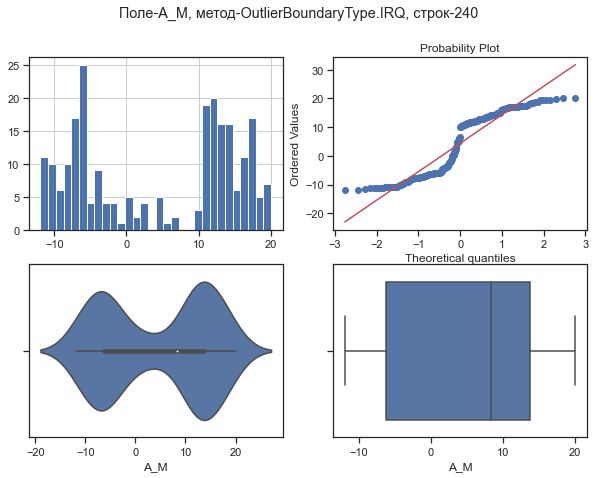

In [35]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(df_del, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(df_del[col] > upper_boundary, True, 
                                 np.where(df_del[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = df_del.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

In [36]:
#Обработка выбросов. Замена
df_zam=df[['Temperature','L', 'R', 'A_M']]
df_zam.shape

(240, 4)

c:\users\sveta\documents\virtualenvs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


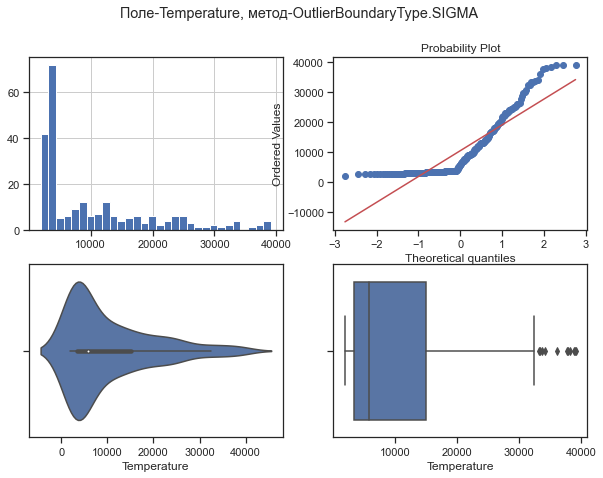

c:\users\sveta\documents\virtualenvs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


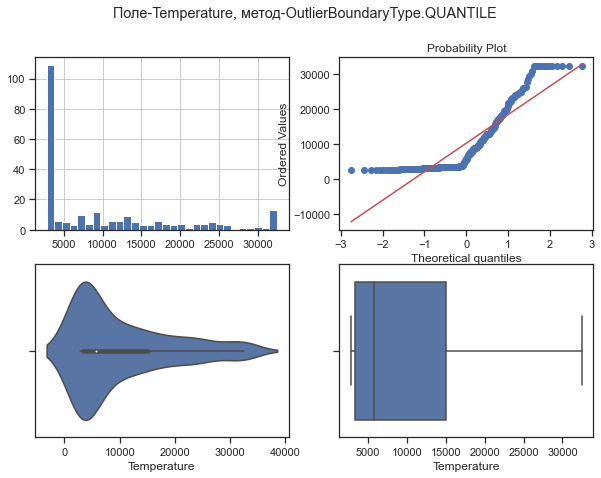

c:\users\sveta\documents\virtualenvs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


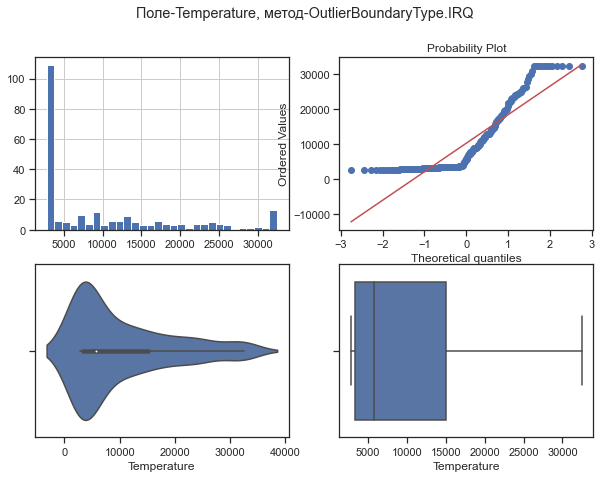

c:\users\sveta\documents\virtualenvs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


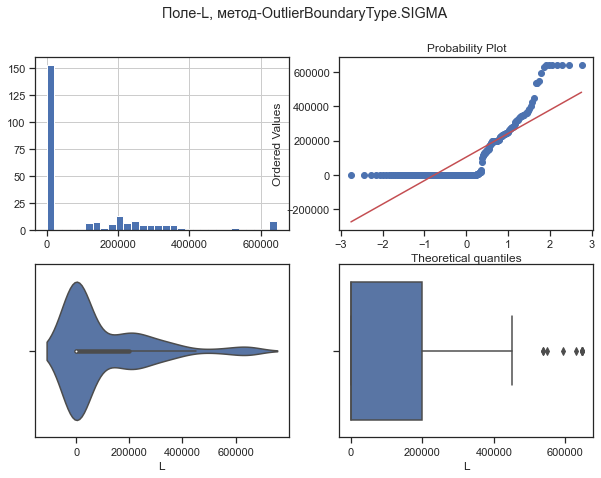

c:\users\sveta\documents\virtualenvs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


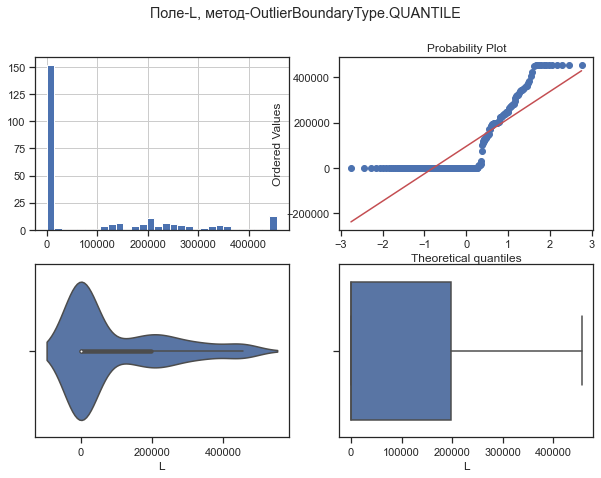

c:\users\sveta\documents\virtualenvs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


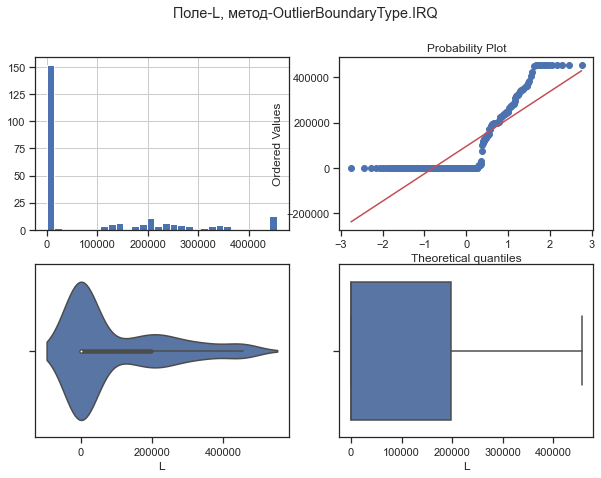

c:\users\sveta\documents\virtualenvs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


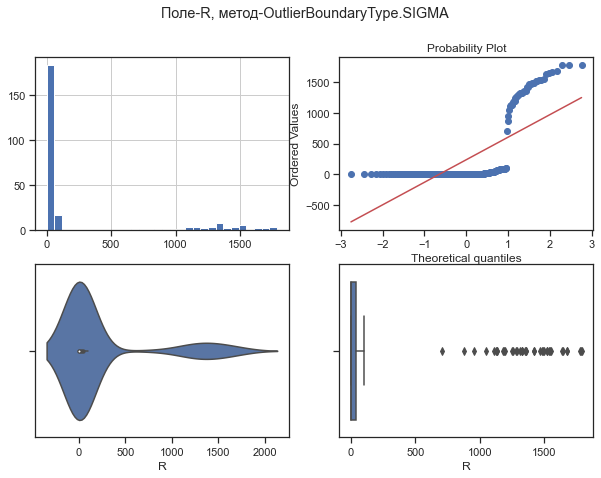

c:\users\sveta\documents\virtualenvs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


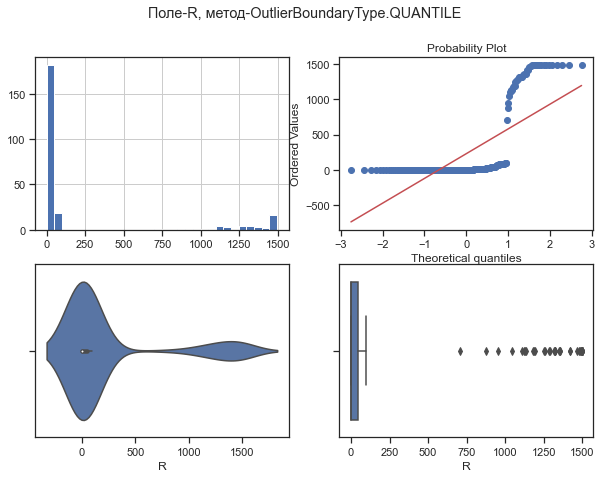

c:\users\sveta\documents\virtualenvs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


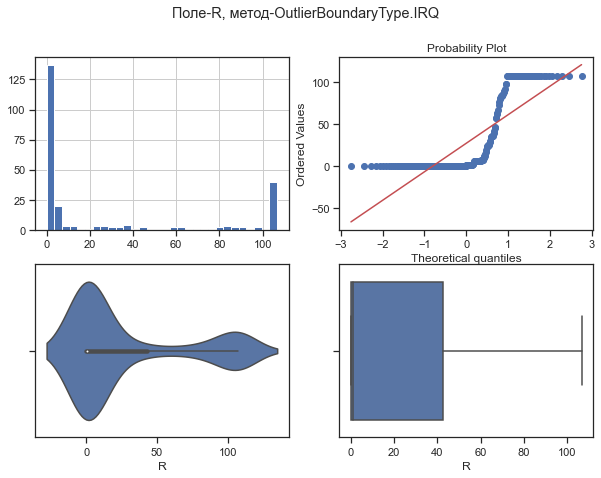

c:\users\sveta\documents\virtualenvs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


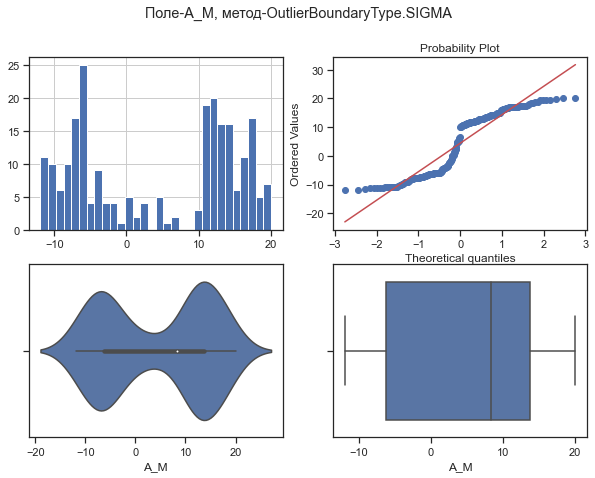

c:\users\sveta\documents\virtualenvs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


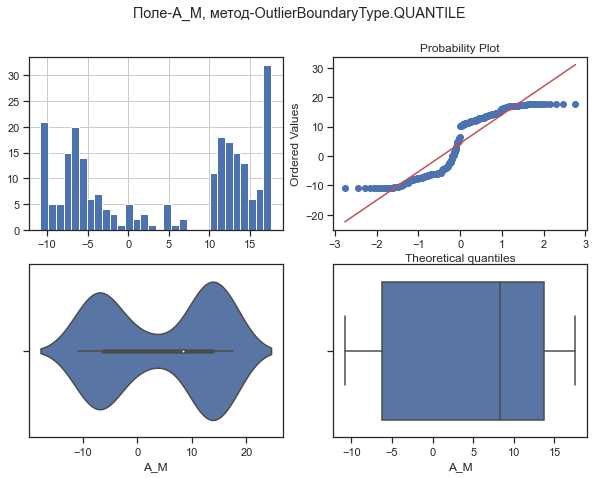

c:\users\sveta\documents\virtualenvs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


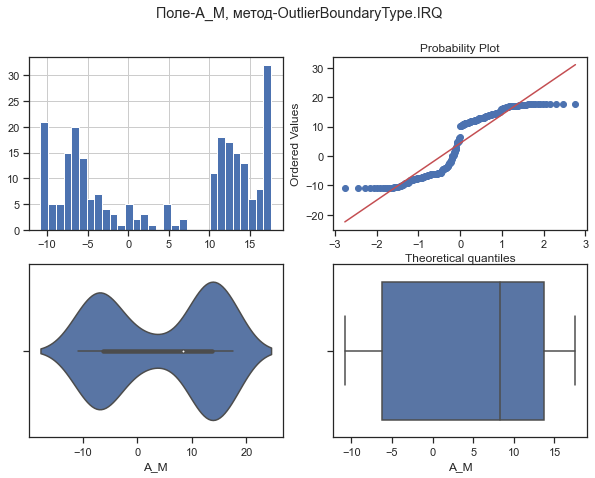

In [37]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(df_zam, col, obt)
        # Изменение данных
        df_zam[col] = np.where(df_zam[col] > upper_boundary, upper_boundary, 
                                 np.where(df_zam[col] < lower_boundary, lower_boundary, df_zam[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(df_zam, col, title)

In [38]:
#Обработка нестандартного признака
df_nest = pd.read_csv('D:\\Ботва\\Магистратура\\2сем\\ММО\\ЛАБ3\\database.csv', sep=";")
df_nest.head()

,Date,Time,Latitude,Longitude,Type
0,01.02.1965,13:44:18,"19,246","145,616",Earthquake
1,01.04.1965,11:29:49,"1,863","127,352",Earthquake
2,01.05.1965,18:05:58,"-20,579","-173,972",Earthquake
3,01.08.1965,18:49:43,"-59,076","-23,557",Earthquake
4,01.09.1965,13:32:50,"11,938","126,427",Earthquake


In [39]:
df_nest['Date'] = df_nest.apply(lambda x: pd.to_datetime(df_nest['Date'], format='%d.%m.%Y'), axis=1)
df_nest['Date']

0     1965-02-01
1     1965-02-01
2     1965-02-01
3     1965-02-01
4     1965-02-01
         ...    
167   1965-02-01
168   1965-02-01
169   1965-02-01
170   1965-02-01
171   1965-02-01
Name: Date, Length: 172, dtype: datetime64[ns]

<AxesSubplot:>

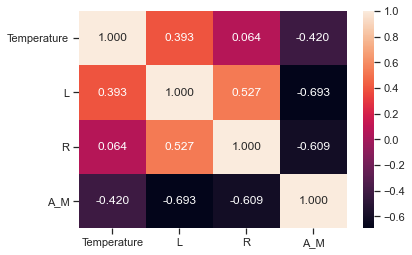

In [40]:
#Отбор признаков. Filter methods
df_filt=df[['Temperature','L', 'R', 'A_M']]
sns.heatmap(df_filt.corr(), annot=True, fmt='.3f')

In [41]:
def make_corr_df(df):
    cr = df.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.5]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [42]:
make_corr_df(df_filt)

,f1,f2,corr
0,L,A_M,0.692619
1,A_M,L,0.692619
2,R,A_M,0.608728
3,A_M,R,0.608728
4,L,R,0.526516
5,R,L,0.526516


In [43]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [44]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(df_filt))

[['A_M', 'R', 'L']]

In [45]:
#Отбор признаков. Wrapper methods
df_wrap=df[['Temperature','L', 'R', 'A_M']]

In [54]:
#Деление выборки на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    df_wrap, df_new['Type'], test_size= 0.2, random_state= 1)

In [46]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

knn = KNeighborsClassifier(n_neighbors=3)

In [53]:
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X_train, y_train, custom_feature_names=['Temperature','L', 'R', 'A_M'])

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 11/11

Best accuracy score: 0.95
Best subset (indices): (2, 3)
Best subset (corresponding names): ('R', 'A_M')


In [57]:
#Отбор признаков. Embedded  methods

e_lr2 = LinearSVC(C=0.01, penalty="l1", max_iter=2000, dual=False)
e_lr2.fit(X_train, y_train)
# Коэффициенты регрессии
e_lr2.coef_

array([[-5.65878472e-04,  0.00000000e+00,  0.00000000e+00,
         1.20905772e-01],
       [-7.32940058e-05, -4.51953820e-04,  0.00000000e+00,
         0.00000000e+00],
       [ 1.28238833e-04, -4.75457653e-02,  0.00000000e+00,
        -8.07668717e-02],
       [ 3.52156805e-05, -8.59369893e-06, -1.47421035e-02,
        -1.04409577e-01],
       [-1.12477497e-04,  1.91833194e-05, -1.15565056e-02,
        -4.43193672e-02],
       [-3.54968317e-04, -5.46040023e-06,  1.24074351e-02,
         0.00000000e+00]])

In [58]:
# Все 4 признака являются "хорошими"
sel_e_lr2 = SelectFromModel(e_lr2)
sel_e_lr2.fit(X_train, y_train)
sel_e_lr2.get_support()

array([ True,  True,  True,  True])